In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
wine_data = pd.read_csv('winequality-red.csv')


In [2]:
# Check first 5 rows
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print("Number of rows: ", str(wine_data.shape[0]))
print("Number of columns: ", str(wine_data.shape[1]))

Number of rows:  1599
Number of columns:  12


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_data.isnull().sum()

# no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

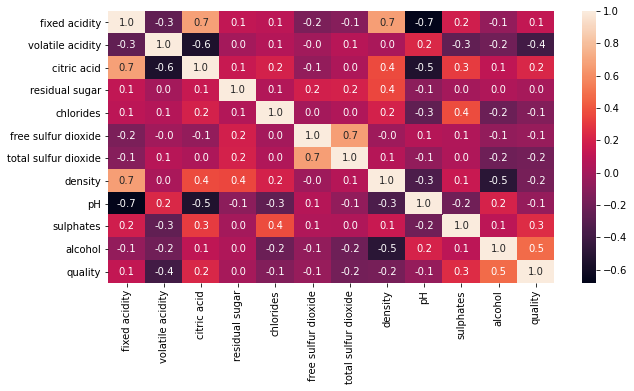

In [7]:
# correlation matrix

plt.figure(figsize=(10,5))
sns.heatmap(wine_data.corr(), annot=True, fmt='0.1f')

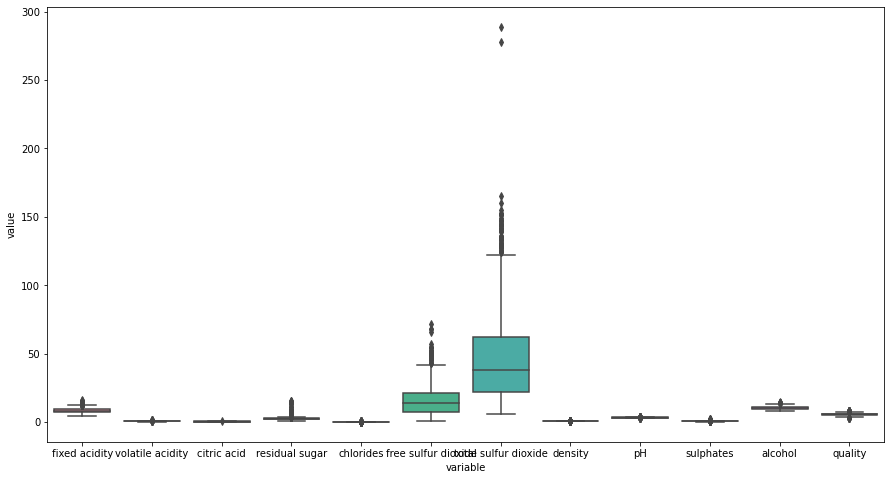

In [8]:
# use box plot to see data distribution

plt.figure(figsize=(15,8))

sns.boxplot(x="variable", y="value", data=pd.melt(wine_data))

plt.show()

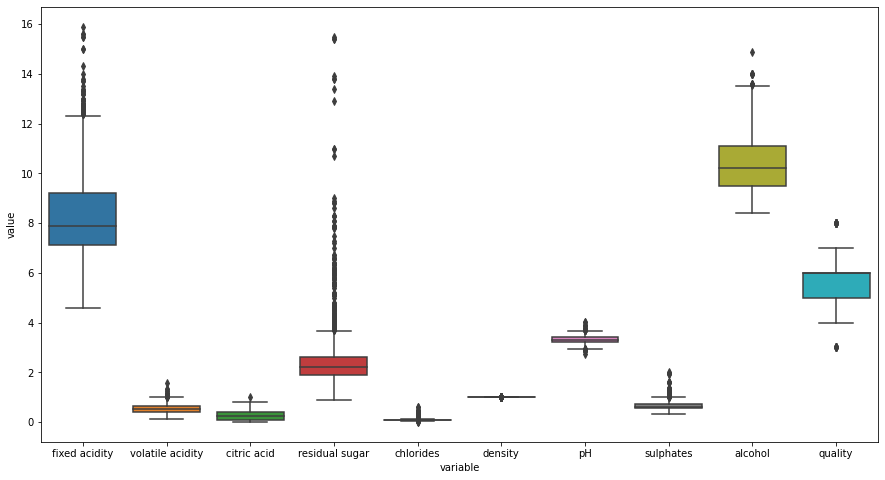

In [9]:
# variables free sulphur diocide and total sulphur diocide
# have much wider value range than other 9 variables
# temporary remove to have a clearer look at the distribution

wine_drop_sulfur = wine_data.drop(['free sulfur dioxide','total sulfur dioxide'], axis=1)

plt.figure(figsize=(15,8))

sns.boxplot(x="variable", y="value", data=pd.melt(wine_drop_sulfur))

plt.show()

In [10]:
# binarization of target variable

unique_quality_values = wine_data['quality'].unique()
print(unique_quality_values)

print('---------------')
print(str(len(wine_data['quality'].unique())) + " unique target variable values.")

[5 6 7 4 8 3]
---------------
6 unique target variable values.


In [11]:
wine_data['quality'] = [1 if x>=7else 0 for x in wine_data['quality']]

In [12]:
# check
wine_data['quality'].unique()

array([0, 1])

In [13]:
# check data balance
wine_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [14]:
# use SMOTE oversampling to deal with imbalanced data

from imblearn.over_sampling import SMOTE


In [15]:
# the variable value ranges varied
# features required normalisation 
# to alleviate unintentional weightage due to varied values range

# first get the matrix (X) and target variable (y)

X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

In [16]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [17]:
y_res.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [18]:
# split test/train - 75/25
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [19]:
# next normalize the features in X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
X_train

array([[-1.39321237,  1.4530201 , -1.16482979, ...,  1.85976511,
        -1.25859775,  0.87690323],
       [ 0.18303875, -2.05232754,  0.64824035, ...,  0.7699351 ,
         0.37929541,  0.87690323],
       [-0.7042468 ,  1.03430891, -1.63454273, ...,  0.6012083 ,
        -1.40113528, -0.78012625],
       ...,
       [ 0.29562812,  0.77551593, -1.68284982, ..., -0.79669553,
        -0.43965117, -0.44944485],
       [-0.21102403,  0.98171285, -1.16482979, ..., -0.0474374 ,
         0.31629952, -0.00732883],
       [-0.77397086,  0.89334274, -1.3720378 , ...,  1.45107885,
        -1.00661419, -1.2452537 ]])

In [21]:
# applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)


In [22]:
pca.explained_variance_ratio_

array([0.29797362, 0.19537578, 0.14482243, 0.09159342, 0.08654476,
       0.05779033, 0.04656066])

In [23]:
sum(pca.explained_variance_ratio_)


0.9206609928910731

In [24]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

In [25]:
logr.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred1 = logr.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred1)
print(f'RMSE: {rmse}')

RMSE: 0.24312590448625182


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score = accuracy_score(y_test, y_pred1)
precision_score = precision_score(y_test, y_pred1)
recall_score = recall_score(y_test, y_pred1)
f1_score = f1_score(y_test, y_pred1)
print(f'Scores\n accuracy: {accuracy_score},\n precision: {precision_score},\n recall: {recall_score},\n f1_score: {f1_score}')



Scores
 accuracy: 0.7568740955137482,
 precision: 0.7402985074626866,
 recall: 0.7537993920972644,
 f1_score: 0.7469879518072289


In [29]:
# svc
from sklearn import svm

In [30]:
svm = svm.SVC()

In [31]:
svm.fit(X_train, y_train)

SVC()

In [32]:
y_pred2 = svm.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred2)
print(f'RMSE: {rmse}')

RMSE: 0.23878437047756873


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
accuracy_score = accuracy_score(y_test, y_pred2)
precision_score = precision_score(y_test, y_pred2)
recall_score = recall_score(y_test, y_pred2)
f1_score = f1_score(y_test, y_pred2)
print(f'Scores\n accuracy: {accuracy_score},\n precision: {precision_score},\n recall: {recall_score},\n f1_score: {f1_score}')

Scores
 accuracy: 0.7612156295224313,
 precision: 0.7455089820359282,
 recall: 0.756838905775076,
 f1_score: 0.751131221719457


In [37]:
# KNeighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred3 = knn.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred3)
print(f'RMSE: {rmse}')

RMSE: 0.29667149059334297


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
accuracy_score = accuracy_score(y_test, y_pred3)
precision_score = precision_score(y_test, y_pred3)
recall_score = recall_score(y_test, y_pred3)
f1_score = f1_score(y_test, y_pred3)
print(f'Scores\n accuracy: {accuracy_score},\n precision: {precision_score},\n recall: {recall_score},\n f1_score: {f1_score}')

Scores
 accuracy: 0.703328509406657,
 precision: 0.6761363636363636,
 recall: 0.723404255319149,
 f1_score: 0.6989720998531571


In [45]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred4 = dt.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred4)
print(f'RMSE: {rmse}')

RMSE: 0.3111432706222865


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [52]:
accuracy_score = accuracy_score(y_test, y_pred4)
precision_score = precision_score(y_test, y_pred4)
recall_score = recall_score(y_test, y_pred4)
f1_score = f1_score(y_test, y_pred4)
print(f'Scores\n accuracy: {accuracy_score},\n precision: {precision_score},\n recall: {recall_score},\n f1_score: {f1_score}')

Scores
 accuracy: 0.6888567293777135,
 precision: 0.7007042253521126,
 recall: 0.6048632218844985,
 f1_score: 0.6492659053833604


In [53]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
y_pred5 = rf.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred5)
print(f'RMSE: {rmse}')

RMSE: 0.23589001447178004


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
accuracy_score = accuracy_score(y_test, y_pred5)
precision_score = precision_score(y_test, y_pred5)
recall_score = recall_score(y_test, y_pred5)
f1_score = f1_score(y_test, y_pred5)
print(f'Scores\n accuracy: {accuracy_score},\n precision: {precision_score},\n recall: {recall_score},\n f1_score: {f1_score}')

Scores
 accuracy: 0.76410998552822,
 precision: 0.7985611510791367,
 recall: 0.6747720364741642,
 f1_score: 0.7314662273476112


In [59]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [61]:
y_pred6 = gbc.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred6)
print(f'RMSE: {rmse}')

RMSE: 0.24746743849493488


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
accuracy_score = accuracy_score(y_test, y_pred6)
precision_score = precision_score(y_test, y_pred6)
recall_score = recall_score(y_test, y_pred6)
f1_score = f1_score(y_test, y_pred6)
print(f'Scores\n accuracy: {accuracy_score},\n precision: {precision_score},\n recall: {recall_score},\n f1_score: {f1_score}')

Scores
 accuracy: 0.7525325615050651,
 precision: 0.7438271604938271,
 recall: 0.7325227963525835,
 f1_score: 0.7381316998468606


In [65]:
import pandas as pd

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [80]:
score_board = pd.DataFrame({'Models': ['LR', 'SVC', 'KNN', 'DT', 'RF', 'GBC'],
              'RMSE': [mean_squared_error(y_test, y_pred1)*100,
                      mean_squared_error(y_test, y_pred2)*100,
                      mean_squared_error(y_test, y_pred3)*100,
                      mean_squared_error(y_test, y_pred4)*100,
                      mean_squared_error(y_test, y_pred5)*100,
                      mean_squared_error(y_test, y_pred6)*100],
              'ACC':[accuracy_score(y_test, y_pred1)*100,
                    accuracy_score(y_test, y_pred2)*100,
                     accuracy_score(y_test, y_pred3)*100,
                     accuracy_score(y_test, y_pred4)*100,
                     accuracy_score(y_test, y_pred5)*100,
                     accuracy_score(y_test, y_pred6)*100],
              'Precision': [precision_score(y_test, y_pred1)*100,
                           precision_score(y_test, y_pred2)*100,
                           precision_score(y_test, y_pred3)*100,
                           precision_score(y_test, y_pred4)*100,
                           precision_score(y_test, y_pred5)*100,
                           precision_score(y_test, y_pred6)*100],
              'Recall': [recall_score(y_test, y_pred1)*100,
                        recall_score(y_test, y_pred2)*100,
                         recall_score(y_test, y_pred3)*100,
                         recall_score(y_test, y_pred4)*100,
                         recall_score(y_test, y_pred5)*100,
                         recall_score(y_test, y_pred6)*100
                        ],
              'f1': [f1_score(y_test, y_pred1)*100,
                    f1_score(y_test, y_pred2)*100,
                    f1_score(y_test, y_pred3)*100,
                    f1_score(y_test, y_pred4)*100,
                    f1_score(y_test, y_pred5)*100,
                    f1_score(y_test, y_pred6)*100 
                    ]
              
})

score_board

,Models,RMSE,ACC,Precision,Recall,f1
0,LR,24.312590,75.687410,74.029851,75.379939,74.698795
1,SVC,23.878437,76.121563,74.550898,75.683891,75.113122
2,KNN,29.667149,70.332851,67.613636,72.340426,69.897210
3,DT,31.114327,68.885673,70.070423,60.486322,64.926591
4,RF,23.589001,76.410999,79.856115,67.477204,73.146623
5,GBC,24.746744,75.253256,74.382716,73.252280,73.813170


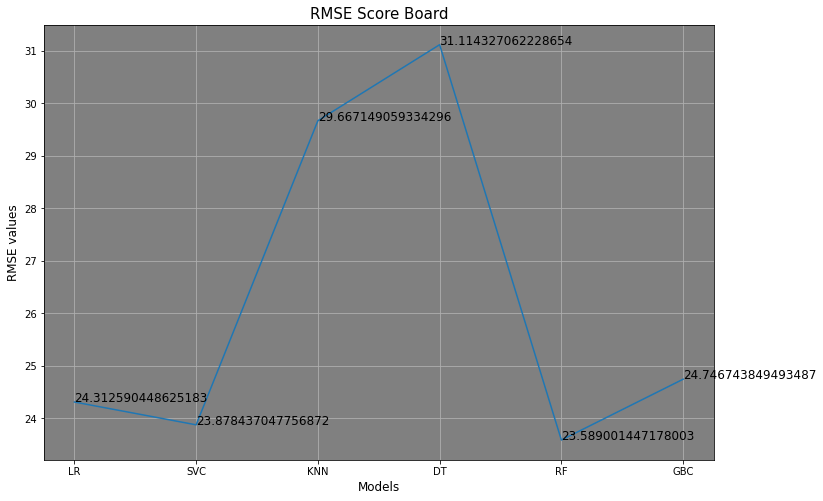

In [124]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12,8))
plt.plot(score_board['Models'],  score_board['RMSE'])
plt.xlabel("Models", size=12)
plt.ylabel("RMSE values", size=12)
plt.title("RMSE Score Board", size=15)
for index in range(len(score_board['Models'])):
  ax.text(score_board['Models'][index], 
          score_board['RMSE'][index], 
          score_board['RMSE'][index], size=12)
plt.grid()
plt.show()

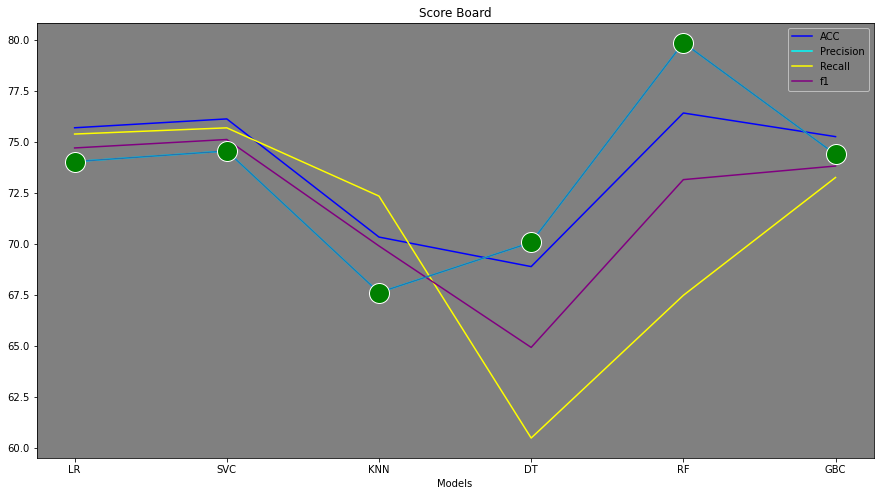

In [121]:
# score board for accuracy, precision, recall and f1 scores

plt.figure(figsize=(15,8))

plt.rcParams['axes.facecolor'] = 'grey'


#Get current axis
ax = plt.gca() 
  
# line plot for Accuracy
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'ACC',
        color = 'blue',ax = ax)
  
# line plot for Precision
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'Precision',
        color = 'cyan', ax = ax)

# line plot for Recall
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'Recall',
        color = 'yellow',ax = ax)

# line plot for Recall
score_board.plot(kind = 'line',
        x = 'Models',
        y = 'f1',
        color = 'purple',ax = ax)

# set the title
plt.title('Score Board')

plt.plot(score_board['Models'], score_board['Precision'], marker="o", markersize=20, 
        markeredgecolor = 'white', markerfacecolor="green")

# show the plot
plt.show()